<a href="https://colab.research.google.com/github/bansalhim/Predictive-lecture_assignment/blob/main/Topsis_for_pre_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== TOPSIS Results =====
     Model  TOPSIS Score  Rank
1  GPT-Neo      0.716084   1.0
3       T5      0.620041   2.0
0    GPT-2      0.558106   3.0
4    BLOOM      0.448698   4.0
2    GPT-J      0.422521   5.0


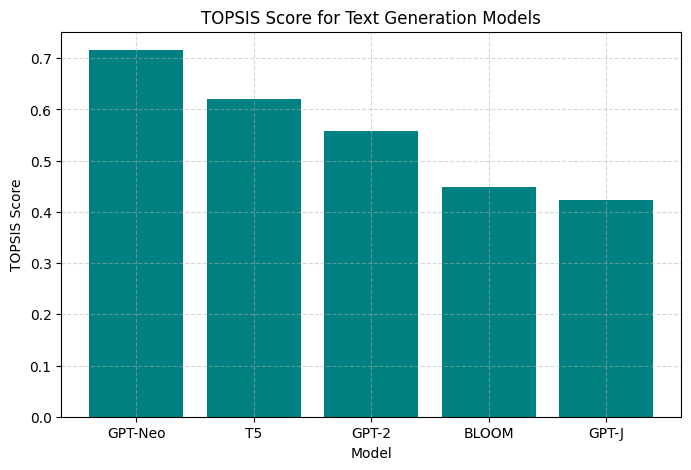

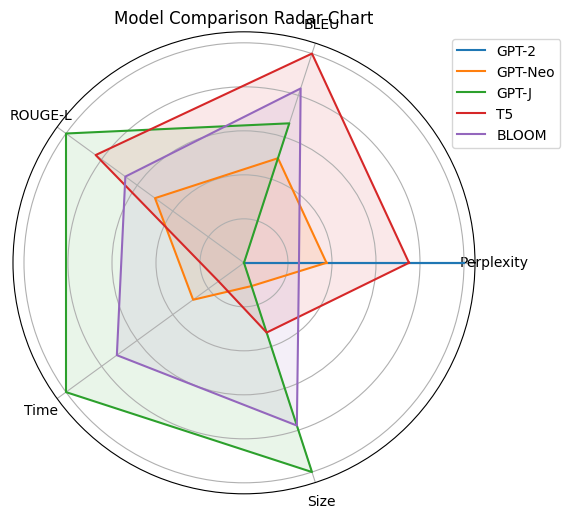

In [1]:
# TOPSIS for Text Generation Models
# Himanshu Bansal
# Roll No: 102303786

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Define Models and Evaluation Criteria
models = ['GPT-2', 'GPT-Neo', 'GPT-J', 'T5', 'BLOOM']# these are pre train models that i selected

# Criteria: Perplexity, BLEU, ROUGE-L, Inference Time, Model Size
#  sample or dummy values
data = np.array([
    [30, 0.32, 0.28, 0.8, 1.5],   # GPT-2
    [25, 0.35, 0.31, 1.0, 2.0],   # GPT-Neo
    [22, 0.36, 0.34, 1.5, 6.0],   # GPT-J
    [28, 0.38, 0.33, 0.9, 3.0],   # T5
    [24, 0.37, 0.32, 1.3, 5.0]    # BLOOM
])

criteria = ['Perplexity', 'BLEU', 'ROUGE-L', 'Time', 'Size']

# Type of criteria (1 = benefit, 0 = cost)
# Lower perplexity, time, size are better → cost; BLEU, ROUGE-L are benefit
criteria_type = [0, 1, 1, 0, 0]

# Weights for each criterion (sum = 1)
weights = np.array([0.25, 0.3, 0.25, 0.1, 0.1])

# STEP 2: Normalize the Decision Matrix
norm_data = data / np.sqrt((data ** 2).sum(axis=0))

# STEP 3: Apply Weights
weighted_data = norm_data * weights

# STEP 4: Identify Ideal Best & Worst Solutions
ideal_best = np.zeros(data.shape[1])
ideal_worst = np.zeros(data.shape[1])

for i in range(data.shape[1]):
    if criteria_type[i] == 1:  # benefit
        ideal_best[i] = np.max(weighted_data[:, i])
        ideal_worst[i] = np.min(weighted_data[:, i])
    else:  # cost
        ideal_best[i] = np.min(weighted_data[:, i])
        ideal_worst[i] = np.max(weighted_data[:, i])

# STEP 5: Compute Distances from Ideal Best & Worst
dist_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

# STEP 6: Calculate TOPSIS Score
topsis_score = dist_worst / (dist_best + dist_worst)

# STEP 7: Rank the Models
results = pd.DataFrame({
    'Model': models,
    'TOPSIS Score': topsis_score
})

results['Rank'] = results['TOPSIS Score'].rank(ascending=False)
results = results.sort_values(by='TOPSIS Score', ascending=False)
print("\n===== TOPSIS Results =====")
print(results)

# STEP 8: Visualization
plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['TOPSIS Score'], color='teal')
plt.title('TOPSIS Score for Text Generation Models')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Radar chart for better visualization
from math import pi

df_radar = pd.DataFrame(data, columns=criteria, index=models)
df_radar = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())  # normalization for radar

angles = np.linspace(0, 2 * np.pi, len(criteria), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for i, model in enumerate(models):
    values = df_radar.loc[model].tolist()
    values += values[:1]
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(criteria)
plt.title('Model Comparison Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()
